In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
pd.set_option(
    'display.max_rows', 100
)
url ="http://publicplansdata.org/api/"
focus_plans_list=['101', '110', '125', '179']
most_improved_list=['124', '90', '89', '134', '123']
least_improved_list=['41', '122', '120', '40', '119']
hardest_hit_list=['168', '130', '184', '151', '31']

In [3]:
#Create dictionary of study plan ids
study_plans_dict={"steady plans":focus_plans_list,
                        "most improved plans":most_improved_list,
                        "least improved plans":least_improved_list,
                        "hardest hit plans":hardest_hit_list}

In [4]:
#Set parameters
paramsratios = {
    "q": "QDataset",
    "dataset": "pensiongasbschedules",
     "format": "json"
}
paramsbasicplandata = {
    "q": "QDataset",
    "dataset": "pensionplanbasics",
     "format": "json"
}
paramspenincomestatement = {
    "q": "QDataset",
    "dataset": "pensionincomestatement",
     "format": "json"
}

In [5]:
#create requests
ratiosresponse = requests.get(url, params = paramsratios)
plandataresponse = requests.get(url,params=paramsbasicplandata)
penincomestatementresponse = requests.get(url,params=paramspenincomestatement)

In [6]:
#create json response object
fundedratiosdata = ratiosresponse.json()
plandata = plandataresponse.json()
penincomestatement = penincomestatementresponse.json()

In [7]:
#change response object into DataFrame
funded_ratios_full = pd.DataFrame(fundedratiosdata[1:])
plan_data_full = pd.DataFrame(plandata[1:])
penincomestatement_data_full = pd.DataFrame(penincomestatement[1:])

In [8]:
plan_data_df=plan_data_full[['ppd_id','PlanName','StateAbbrev','PlanClosed','PlanYearClosed',]]

In [9]:
#Create DF and drop any rows with empty data
penincomestatement_data_df=penincomestatement_data_full[['ppd_id','fy','expense_AdminExpenses','expense_investments_tot','MktAssets_net','BegMktAssets_net']].dropna()
funded_ratio_df=funded_ratios_full[['ppd_id','fy','ActFundedRatio_GASB','ActFundedRatio_est','PercentReqContPaid']].dropna()

In [10]:
plan_income_data_df=pd.merge(penincomestatement_data_df,plan_data_df,how="inner",on="ppd_id")
plan_income_data_df['expense_AdminExpenses'] = plan_income_data_df['expense_AdminExpenses'].astype(float)
plan_income_data_df['expense_investments_tot'] = plan_income_data_df['expense_investments_tot'].astype(float)

In [11]:
plan_income_funded_data_df=pd.merge(plan_income_data_df,funded_ratio_df,how="inner",left_on=["ppd_id","fy"],right_on=["ppd_id","fy"])

In [12]:
plan_income_funded_data_df['ActFundedRatio_GASB'] = plan_income_funded_data_df['ActFundedRatio_GASB'].astype(float)
plan_income_funded_data_df['PercentReqContPaid'] = plan_income_funded_data_df['PercentReqContPaid'].astype(float)
plan_income_funded_data_df['MktAssets_net'] = plan_income_funded_data_df['MktAssets_net'].astype(float)
plan_income_funded_data_df['BegMktAssets_net'] = plan_income_funded_data_df['BegMktAssets_net'].astype(float)

In [13]:
plan_income_funded_data_df['Avg_Assets']=(plan_income_funded_data_df['MktAssets_net']+plan_income_funded_data_df['BegMktAssets_net'])/2
plan_income_funded_data_df['Total_absExpenses']=plan_income_funded_data_df['expense_AdminExpenses'].abs()+plan_income_funded_data_df['expense_investments_tot'].abs()

In [14]:
plan_income_funded_data_df['Exp_Asset_Ratio']=plan_income_funded_data_df['Total_absExpenses']/plan_income_funded_data_df['Avg_Assets']
plan_income_funded_data_df['Exp_Asset_Ratio'].describe()

count    3416.000000
mean        0.004877
std         0.002948
min         0.000003
25%         0.002889
50%         0.004384
75%         0.006293
max         0.027690
Name: Exp_Asset_Ratio, dtype: float64

steady plans


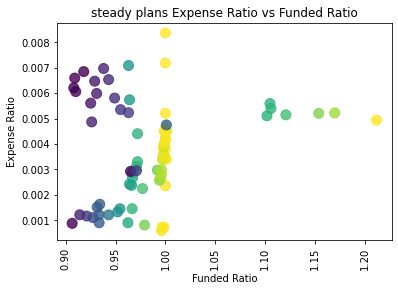

most improved plans


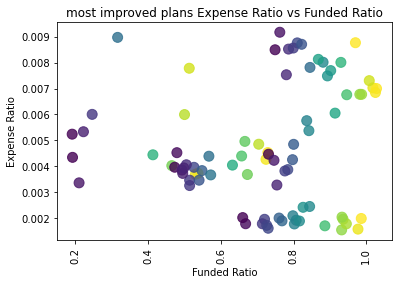

least improved plans


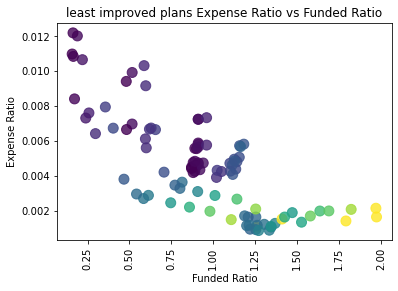

hardest hit plans


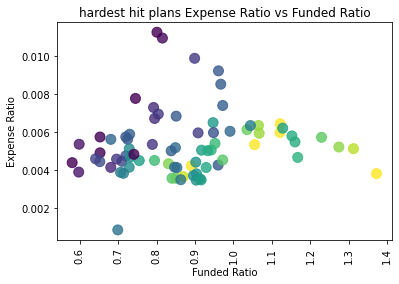

In [22]:
#Generate single plot for each key in the dictionary
for key,value in study_plans_dict.items():
    for plans in value:
        plan_x=plan_income_funded_data_df[plan_income_funded_data_df["ppd_id"]==plans]
        plan_x_exprat=plan_x["Exp_Asset_Ratio"]
        plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
        plan_x_fy=plan_x["fy"]
        plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
        plt.title(f'{key} Expense Ratio vs Funded Ratio')
        plt.xlabel("Funded Ratio")
        plt.ylabel("Expense Ratio")
        plt.scatter(plan_x_fundrat,plan_x_exprat,c=plan_x_fundrat,s=100,alpha=.8)
        plt.xticks(rotation=90)
    print(key)
    plt.show()

steady plans


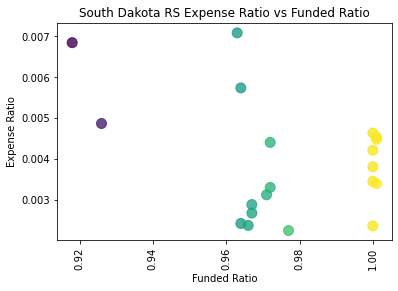

steady plans


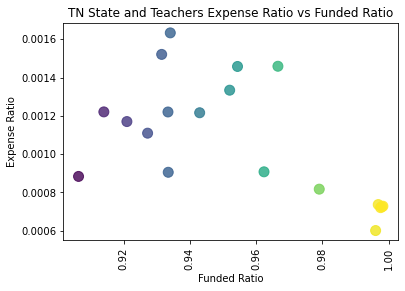

steady plans


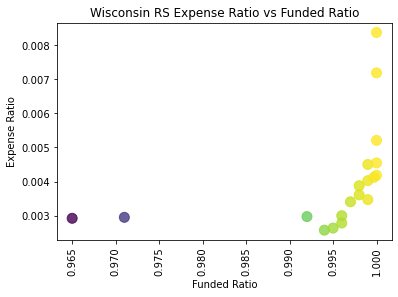

steady plans


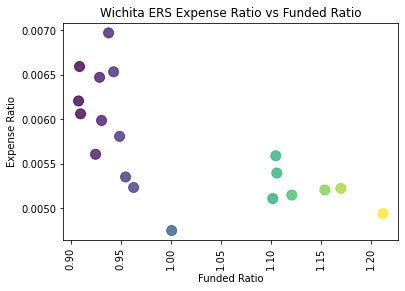

most improved plans


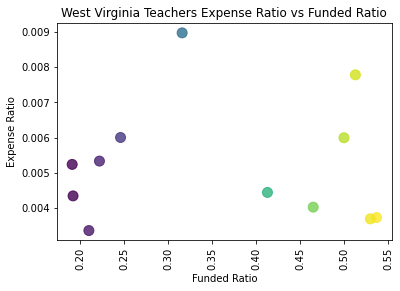

most improved plans


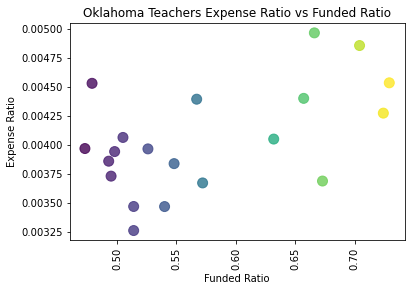

most improved plans


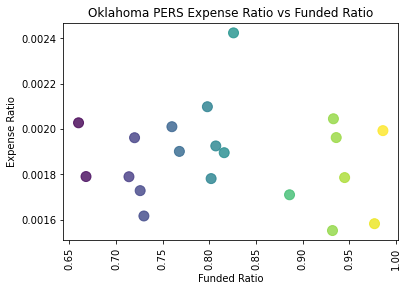

most improved plans


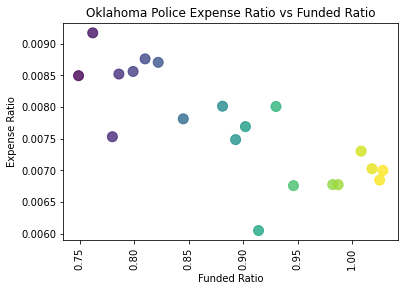

most improved plans


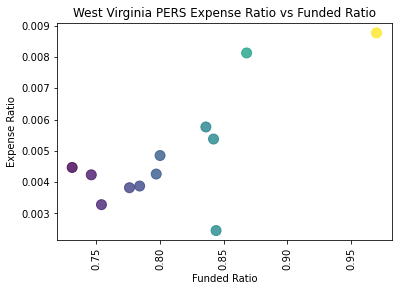

least improved plans


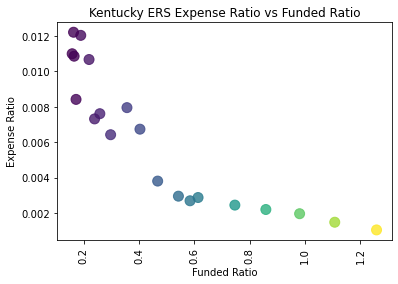

least improved plans


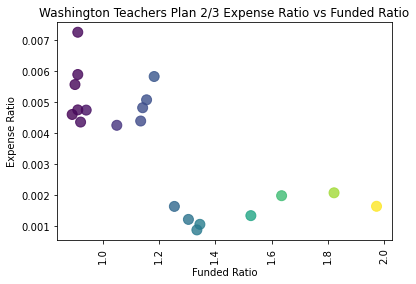

least improved plans


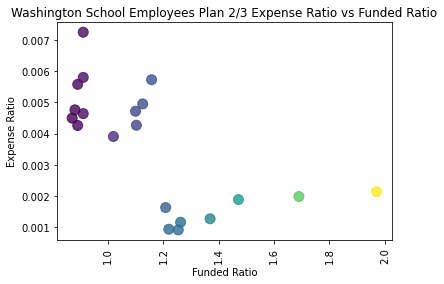

least improved plans


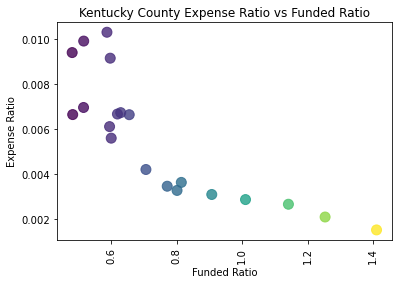

least improved plans


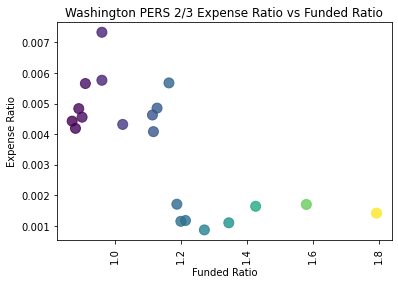

hardest hit plans


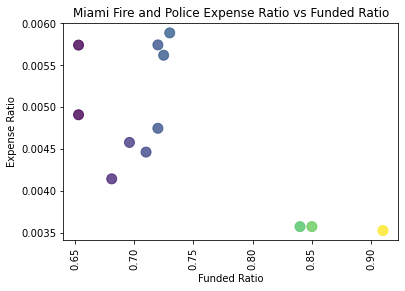

hardest hit plans


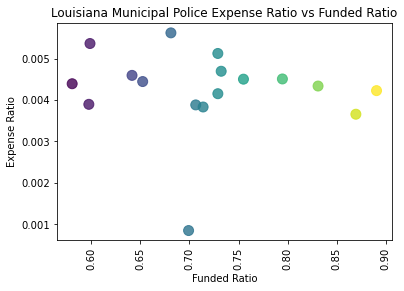

hardest hit plans


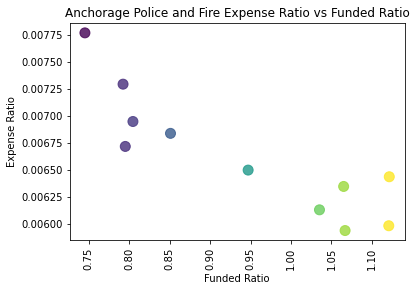

hardest hit plans


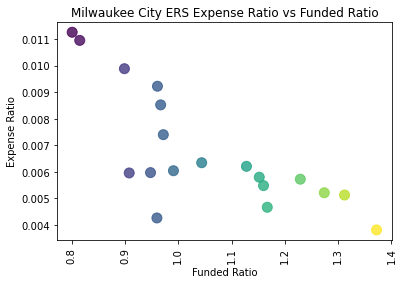

hardest hit plans


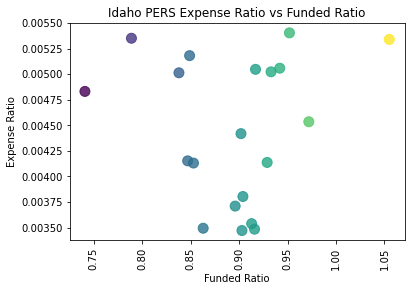

In [21]:
#Generate individual plots for all values in the dictionary
for key,value in study_plans_dict.items():
    for plans in value:
        plan_x=plan_income_funded_data_df[plan_income_funded_data_df["ppd_id"]==plans]
        plan_x_exprat=plan_x["Exp_Asset_Ratio"]
        plan_x_fundrat=plan_x["ActFundedRatio_GASB"]
        plan_x_fy=plan_x["fy"]
        plan_x_name=plan_data_df.loc[plan_data_df['ppd_id'] == plans, 'PlanName'].iloc[0]
        plt.title(f'{{plan_x_name} Expense Ratio vs Funded Ratio')
        plt.xlabel("Funded Ratio")
        plt.ylabel("Expense Ratio")
        plt.scatter(plan_x_fundrat,plan_x_exprat,c=plan_x_fundrat,s=100,alpha=.8)
        plt.xticks(rotation=90)
        print(key)
        plt.show()